# ***`Assignment-5: Handwritten Digit Classification`***

# **`Task-1: Imporing, flattening the given data`**

In [391]:
#Importing necessary libraries
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn.metrics import accuracy_score
import pandas as pd

In [392]:
#Loading the given Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

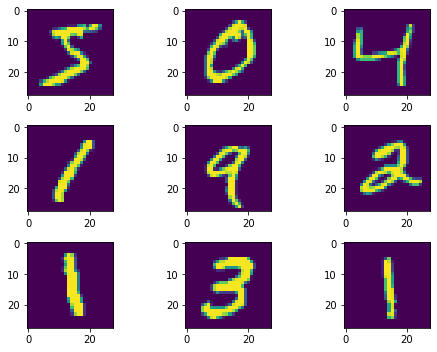

In [393]:
#Representation of few training examples
plt.figure(figsize=(7,5))
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i])
plt.tight_layout()

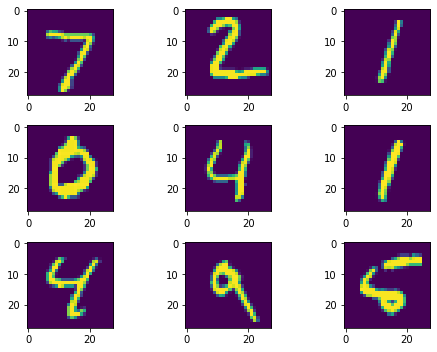

In [394]:
#Representation of few testing examples
plt.figure(figsize=(7,5))
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_test[i])
plt.tight_layout()

In [395]:
#Flattening the given data
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [396]:
#Converting the given data to a binary vector
X_train = X_train/255
X_test = X_test/255
X_train = np.where(X_train!= 0, 1, 0)
X_test = np.where(X_test!=0, 1, 0)

In [397]:
#Combining the given data to split further
new_X= np.concatenate((X_train,X_test))
new_y=np.concatenate((y_train,y_test))
print('The shape of given X-data is',new_X.shape)
print('The shape of given y-data is',new_y.shape)

The shape of given X-data is (70000, 784)
The shape of given y-data is (70000,)


In [398]:
#Function to split the data
def split_data(data,ratio1,ratio2):
  #Shuffling the data so as to randomnly choose the train and test set
  set_size_1 = int(len(data)*ratio1)
  set_size_2 = int(len(data)*(ratio2+ratio1))
  #Dividing the given data into Test and Train datas
  train_index = data[:set_size_1]
  test_index = data[set_size_1:set_size_2]
  validation_index = data[set_size_2:]
  return train_index,test_index,validation_index

In [399]:
#Splitting the given data to 60-20-20 percentages of train,test,validation respectively
X_train,X_test,X_validation = split_data(new_X,0.6,0.2)
y_train,y_test,y_validation = split_data(new_y,0.6,0.2)

In [400]:
#Re-shaping the y-data
y_train=y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
y_validation =y_validation.reshape(y_validation.shape[0],1)

# **`Task-2: Accuracy of the Decision tree on validation set`**

In [401]:
#Function to choose 'a'-random indexes
def random_index(a):
  n=[]
  for i in range(a):
    n.append(random.randint(0,X_train.shape[1]-1))
  return n

In [402]:
#Building X-train data
X2 = random_index(10)
X1=X_train[:,X2]

In [403]:
#Building our Decision Tree model
classifier = DecisionTreeClassifier(random_state = 0,max_depth=5)
classifier.fit(X1, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [404]:
#Predicting and finding accuracy on validation set
y_prediction = classifier.predict(X_validation[:,X2])
accuracy = accuracy_score(y_validation, y_prediction)
print('The accuracy of the model is:',accuracy*100)

The accuracy of the model is: 40.32142857142857


# **`Task-3: Accuracy on validation set using 50 different models`**

In [405]:
#Function to build our model and predict its accuracy
def decision_tree(X1,X2,y,X_valid,y_valid):
  classifier = DecisionTreeClassifier(random_state = 0,max_depth=5)  
  classifier.fit(X1, y) 
  y_pred = classifier.predict(X_valid[:,X2])
  accuracy = accuracy_score(y_valid, y_pred)
  #Returning the accuracy,predicted value and the model
  return accuracy,y_pred,classifier

In [406]:
#Variables to saved the predicted values,models,accuracies
classifiers=[]
accuracies = []
pred=[]
features=[]
#Function to find the accuracies of 50-different classifiers
for i in range(50):
  X2 = random_index(10)
  features.append(X2)
  X1=X_train[:,X2]
  accuracy,y_pred,classifier = decision_tree(X1,X2,y_train,X_validation,y_validation)
  classifiers.append(classifier)
  accuracies.append(accuracy)
  pred.append(y_pred)

In [407]:
#Printing the accuracies of the models
for i in range(50):
  print("Precentage Accuracy of model",i+1,":",round(accuracies[i]*100,3))

Precentage Accuracy of model 1 : 21.5
Precentage Accuracy of model 2 : 41.871
Precentage Accuracy of model 3 : 39.779
Precentage Accuracy of model 4 : 33.457
Precentage Accuracy of model 5 : 24.464
Precentage Accuracy of model 6 : 36.757
Precentage Accuracy of model 7 : 25.9
Precentage Accuracy of model 8 : 39.357
Precentage Accuracy of model 9 : 22.893
Precentage Accuracy of model 10 : 39.457
Precentage Accuracy of model 11 : 29.993
Precentage Accuracy of model 12 : 40.25
Precentage Accuracy of model 13 : 31.971
Precentage Accuracy of model 14 : 33.407
Precentage Accuracy of model 15 : 47.143
Precentage Accuracy of model 16 : 45.193
Precentage Accuracy of model 17 : 46.693
Precentage Accuracy of model 18 : 35.021
Precentage Accuracy of model 19 : 26.986
Precentage Accuracy of model 20 : 33.764
Precentage Accuracy of model 21 : 32.379
Precentage Accuracy of model 22 : 28.95
Precentage Accuracy of model 23 : 32.271
Precentage Accuracy of model 24 : 45.836
Precentage Accuracy of model 25

# **`Task-4: Weighted classification of the test set`**

In [408]:
#Applying the above on the test data
test_pred=[]
for i in range(50):
  X1=X_test[:,features[i]]
  y_pred = classifiers[i].predict(X1)
  test_pred.append(y_pred)
y_prediction=np.array(test_pred)

In [409]:
#Predicting the accuracy on test data
y_predicted_final=[]
for i in range(y_prediction.shape[1]):
  #Dictionary to check the weights 
  chance_dict={0:0,
               1:0,
               2:0,
               3:0,
               4:0,
               5:0,
               6:0,
               7:0,
               8:0,
               9:0}
  #Increasing the weights for the predicted values
  for j in range(y_prediction.shape[0]):
    chance_dict[y_prediction[j,i]]+=accuracies[j]
  predict=max(chance_dict,key=chance_dict.get)
  y_predicted_final.append(predict)

In [410]:
#Finding the accuracy
w=0
for i in range(14000):
  if(y_test[i]==y_predicted_final[i]):
    w+=1
print("Percentage Accuracy:",round(w/140,3))

Percentage Accuracy: 66.707


# **`Task-5: Implemeting Adaboost Algorithm`**

In [411]:
#Intialising the weights 
Weight=np.ones(shape=X_train.shape[0])/X_train.shape[0]

In [412]:
#Function to find out weighted error and weightage of our classifier
def parameters(y_p,y_t,W): 
    eT = 0
    #If correctly classified multiplying weight with zero else with one
    for i in range(len(W)):
        if(y_p[i]!=y_t[i]):
            eT = eT + W[i]
    #Calculating the weighted error
    aT = 0.5*np.log((1-eT)/eT)
    return aT,eT

In [413]:
#Function to updagte the weights
def updating_weight(Weight,aT):
    for i in range(len(Weight)):
      #Checking if its correctly classified or not and accordingly increasing the weights
            if(y_prediction[i]!=y_train[i]):
                Weight[i] = Weight[i]*np.exp(aT)
            else :
                Weight[i] =  Weight[i]*np.exp(-aT)
    return Weight

In [414]:
#Normalising the weights
def normalising_weight(Weight):
    m = sum(Weight)
    Weight = Weight/m
    return Weight

In [415]:
#Using the Random Forest as the initial Classifier for Adaboost
for i in range(50):
  y_prediction = classifiers[i].predict(X_train[:,features[i]])
    #Finding the parameters
  aT,eT = parameters(y_prediction,y_train,Weight)
      #Accordingly updating the weights
  Weight = updating_weight(Weight,aT)
    #Finally normally the weights
  Weight = normalising_weight(Weight)

In [416]:
#Performing 20-iterations of Adaboost Algorithm
classifier_a = []
class_weight = []
class_error = []
for x in range(20):
    #Making a new classifier
    classifier = DecisionTreeClassifier(random_state = 0,max_depth=5,criterion="entropy")
    classifier_a.append(classifier)
    classifier.fit(X_train, y_train,sample_weight = Weight) 
    #Predicting the X_train
    y_prediction = classifier.predict(X_train)
    #FInding the parameters
    aT,eT = parameters(y_prediction,y_train,Weight)
    class_weight.append(aT)
    class_error.append(eT)
    #Accordingly updating the weights
    Weight = updating_weight(Weight,aT)
    #Finally normally the weights
    Weight = normalising_weight(Weight)

In [417]:
#Printing the weighted error
for i in range(20):
  print('The Weightage of classifier(aT):',i+1,':',class_weight[i])
  print('The Weighted Error of classifier(eT)',i+1,':',class_error[i])
  print()

The Weightage of classifier(aT): 1 : 0.7892423950859849
The Weighted Error of classifier(eT) 1 : 0.17101017973606716

The Weightage of classifier(aT): 2 : 0.4861889152418881
The Weighted Error of classifier(eT) 2 : 0.27440680394887856

The Weightage of classifier(aT): 3 : 0.29224827222949756
The Weighted Error of classifier(eT) 3 : 0.35789859646722516

The Weightage of classifier(aT): 4 : 0.22543486474679975
The Weighted Error of classifier(eT) 4 : 0.3891539999803237

The Weightage of classifier(aT): 5 : 0.15984431141173366
The Weighted Error of classifier(eT) 5 : 0.42075163472903604

The Weightage of classifier(aT): 6 : 0.04824769772815282
The Weighted Error of classifier(eT) 6 : 0.47589485254537417

The Weightage of classifier(aT): 7 : 0.10159229961655125
The Weighted Error of classifier(eT) 7 : 0.44937788734088857

The Weightage of classifier(aT): 8 : 0.03181224985134842
The Weighted Error of classifier(eT) 8 : 0.484099238671267

The Weightage of classifier(aT): 9 : 0.02608671495380

# **`Task-6: Classification on the test set`**

In [418]:
#Applying the above on the test data
y_predA = []
for i in range(20):
    #Predicting the X-test data
    predA = classifier_a[i].predict(X_test)
    y_predA.append(predA)
y_predA=np.array(y_predA)

In [419]:
#Checking the number of correcly classified data
correct_classified = 0
y_predict_final=[]
for i in range(len(X_test)):
  prediction_dict={0:0,
               1:0,
               2:0,
               3:0,
               4:0,
               5:0,
               6:0,
               7:0,
               8:0,
               9:0}
  for j in range(20):
    prediction_dict[y_predA[j,i]]+=class_weight[j]
  predict = max(prediction_dict,key=prediction_dict.get)
  y_predict_final.append(predict)

In [420]:
#Finding the accuracy
acc=0
for i in range(14000):
  if(y_test[i]==y_predict_final[i]):
    acc+=1
print("Percentage Accuracy:",round(acc/140,3))

Percentage Accuracy: 72.014
